## Spectrograms of Real Data - tidied up
   Here results are presented in cells
    

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

#read in n lines of data         X0   Y0   X1   Y1
#the data is the signal in Volts, but the callibration is not clear yet so take as arbitrary units
#skips the first 7 rows and places the next 10000 in a numpy array
data43 = np.loadtxt(fname = 'dataFiles/run-43', skiprows = 7, max_rows = 4000000)

### Spectrogram

Text(0.5, 1.0, 'Unnormalised spectrogram')

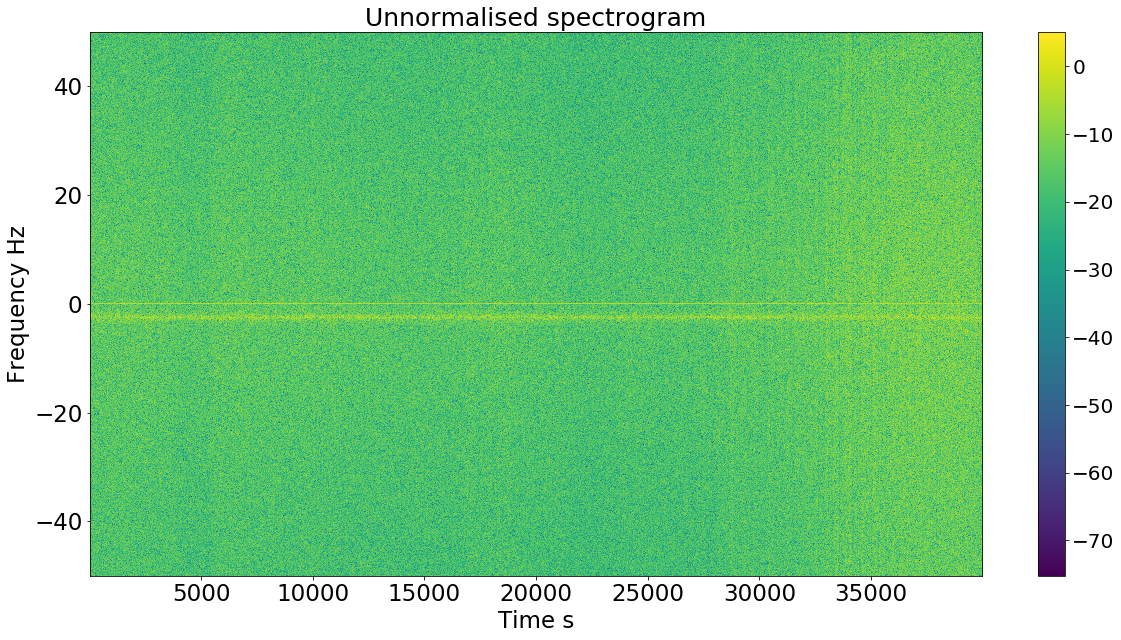

In [11]:
#Make complex signal
X0 = data43[:,0]
Y0 = data43[:,1]
iY0 = 1j*Y0
#combine x+iy to make complex signal
sig_0 = X0+iY0


#Differencing
#first make spectrogram of X0+iY0
plt.figure(figsize=(20,10))

spectrum, freqs, t_bins, im = plt.specgram(x=sig_0, Fs=1/dt, NFFT = 2000)

plt.ylabel("Frequency Hz",fontsize=23)
plt.xlabel("Time s",fontsize=23)
cbar = plt.colorbar(im);
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
cbar.ax.tick_params(labelsize=20)
plt.title('Unnormalised spectrogram',fontsize=25)



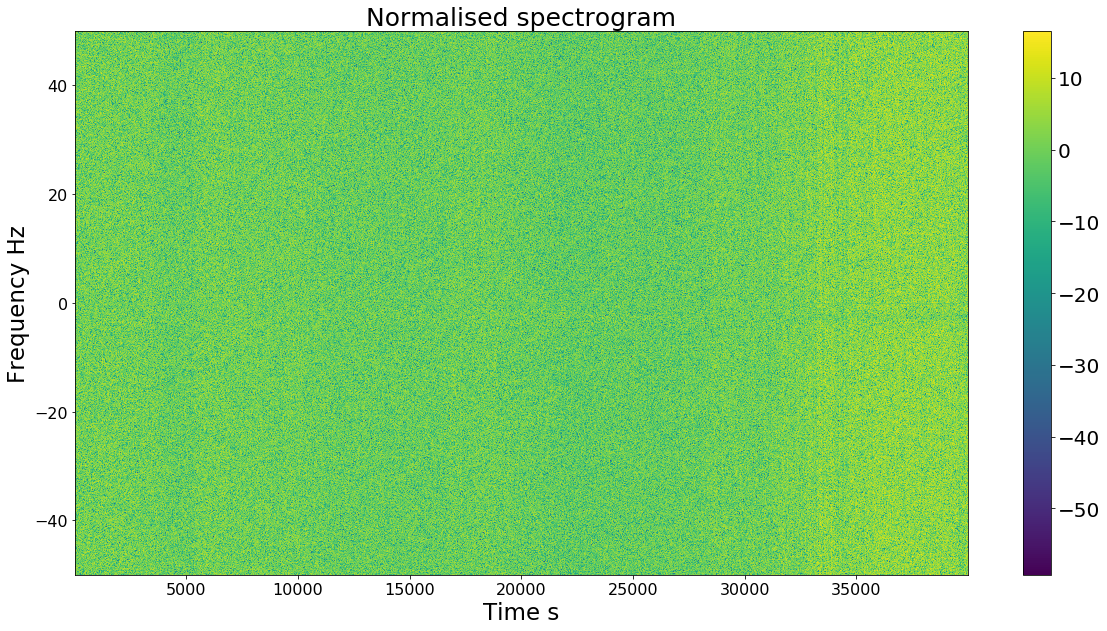

In [12]:
#normalise spectrum powers
#Median normalisation across individual frequencies
norm_spectrum = np.ones(np.shape(spectrum))
for row in range(len(spectrum)):
    median_row =  np.median(spectrum[row])
    norm_spectrum[row] = spectrum[row]/median_row

    #plotting spectrogram with normalised powers
plt.figure(figsize=(20,10))
plt.pcolormesh(t_bins, freqs, 10 * np.log10(norm_spectrum))

plt.ylabel("Frequency Hz",fontsize=23)
plt.xlabel("Time s",fontsize=23)
cbar = plt.colorbar();
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Normalised spectrogram',fontsize=25)


cbar.ax.tick_params(labelsize=20)

### Frequency Slicing

In [14]:
#Frequency slicing
#need to take frequencies in the resonant mode roughly 2-4Hz and one ouside this range eg. 30-40Hz

def freq_slice(min_freq, max_freq, freqs, t_bins, norm_spectrum):
    '''function slices the array containing the frequency spectrum using the min and max boundaries,
    and the corresponding spectrum powers. It plots the slices specgram and returns slice spectrum.'''
    
    #find the elements in the array in the HZ range
    slice_freqs = freqs[(min_freq<freqs) & (freqs<max_freq)]
    #and their indicies
    slice_indices = np.where((min_freq<freqs) & (freqs<max_freq))

    #need the spectrum powers corresponding to these freqs
    slice_spectrum = norm_spectrum[slice_indices]
    #res_mode_tbins = t_bins[res_mode_indices]
    
    #This doesn't really need plotted
    '''
    #now plot the spectrogram for this range
    plt.pcolormesh(t_bins, slice_freqs, 10 * np.log10(slice_spectrum))
    
    
    plt.ylabel("Frequency Hz",fontsize=23)
    plt.xlabel("Time s",fontsize=23)
    cbar = plt.colorbar();
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    cbar.ax.tick_params(labelsize=20)
    '''
    
    return slice_spectrum

#Call function for resonant mode slice
res_slice_spec = freq_slice(2,3, freqs=freqs, t_bins=t_bins, norm_spectrum=norm_spectrum)

#Call function for background
bkgd_slice_spec = freq_slice(20,30, freqs=freqs, t_bins=t_bins, norm_spectrum=norm_spectrum)


### Differencing

In [16]:
#need array containing the differences between successive columns of spectrogram data in spectrum

def difference(power_spectrum, spec_ydim, spec_xdim):
    
    #difference array will have one fewer column than the spectrogram
    diff_spec = np.ones((spec_ydim, spec_xdim -1))

    for i in range(spec_ydim):
        for j in range(spec_xdim-1):
            diff_spec[i,j] = power_spectrum[i,j+1] - power_spectrum[i,j]
    #square differences
    diff_spec = np.square(diff_spec)
    
    return diff_spec

#resonant mode slice:
res_diff_spec = difference(res_slice_spec, np.shape(res_slice_spec)[0], np.shape(res_slice_spec)[1])
bkgd_diff_spec = difference(bkgd_slice_spec,np.shape(bkgd_slice_spec)[0], np.shape(bkgd_slice_spec)[1])

'diff_spec = np.ones((ydim, xdim -1))\n\nfor i in range(ydim):\n    for j in range(xdim-1):\n        diff_spec[i,j] = norm_spectrum[i,j+1] - norm_spectrum[i,j]\n#square differences\ndiff_spec = np.square(diff_spec)'

### Histogram of differenced and undifferenced data

In [29]:
#slices histogram

def slice_hist(spectrogram, title):
    

    #want to plot all pixels so flatten array to 1D
    spectrogram = np.array(spectrogram).flatten()

    #Histogram of logN vs diff(f,t) - (N counts)
    n, bins, patches = plt.hist(x=spectrogram, bins='auto', log = True)
    
    plt.xlabel('d(f,t)')
    plt.ylabel('log(N)')
    plt.xlim(-100,800)
    plt.title(title)
    return n, bins

In [ ]:
#plot hists of both slices, differenced and undifferenced
plt.figure(figsize=(20,10))
plt.xlim(-100,1400)

#1-resonant mode slice, undifferenced
plt.subplot(221)
slice_hist(res_slice_spec, title = 'Undifferenced Spectrogram: 2-4Hz Resonant Mode')

#2-resonant mode slice, differenced
plt.subplot(222)
slice_hist(res_diff_spec, title = 'Differenced Spectrogram: 2-4Hz Resonant Mode')

#3-background slice, undifferenced
plt.subplot(223)
slice_hist(bkgd_slice_spec, title = 'Undifferenced Spectrogram: Background')

#4-background slice, undifferenced
plt.subplot(224)
slice_hist(bkgd_diff_spec, title = 'Differenced Spectrogram: Background')

(array([8.9505e+04, 3.0979e+04, 2.1293e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]),
 array([1.19631787e-12, 1.11891747e-01, 2.23783493e-01, ...,
        1.19466818e+03, 1.19478007e+03, 1.19489196e+03]))